In [20]:
%matplotlib inline

import datetime 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score
from sklearn import metrics
import inspect
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

In [5]:
data = pd.read_csv('price.csv.csv')

data['pay_as_you_go_price'] = data['pay_as_you_go_price'].astype(float)
data['api_price'] = data['api_price'].astype(float)
data['cli_price'] = data['cli_price'].astype(float)
data['1_year_reserved_price'] = data['1_year_reserved_price'].astype(float)
data['3_year_reserved_price'] = data['3_year_reserved_price'].astype(float)

In [6]:
def plot_data(x, y):  
    plt.plot(x,y)
    plt.show()

In [7]:
data2 = data[data['api_price']!= float('-inf')]
data2 = data2[data['pay_as_you_go_price']!= float('-inf')]
data2 = data2[data['1_year_reserved_price']!= float('-inf')]
data2 = data2[data['3_year_reserved_price']!= float('-inf')]
data2.shape

(1014, 11)

In [8]:
data2.groupby(['region', 'size'], as_index=False).mean() 

,region,size,api_price,cli_price,pay_as_you_go_price,1_year_reserved_price,3_year_reserved_price,%_saving_pay_as_you_go,%_saving_1y_reserved,%_saving_3y_reserved
0,australiacentral,Standard_D2s_v3,0.012500,0.012500,0.125,0.078425,0.052626,90.000000,84.061135,76.247289
1,australiacentral,Standard_D4s_v3,0.025000,0.025000,0.250,0.156849,0.105289,90.000000,84.061135,76.255873
2,australiacentral,Standard_D8s_v3,0.050000,0.050000,0.500,0.313584,0.210578,90.000000,84.055333,76.255873
3,australiacentral,Standard_E16_v4,0.146200,0.146200,1.462,0.862329,0.555403,90.000000,83.045909,73.676788
4,australiacentral,Standard_E2_v4,0.018300,0.018300,0.183,0.107763,0.069444,90.000000,83.018220,73.648000
...,...,...,...,...,...,...,...,...,...,...
73,ukwest,Standard_E4_v4,0.035441,0.035441,0.305,0.179909,0.115868,88.380000,80.300561,69.412497
74,ukwest,Standard_E4s_v3,0.069971,0.069971,0.372,0.183447,0.117314,81.190591,61.857750,40.355567
75,ukwest,Standard_E4s_v4,0.035441,0.035441,0.305,0.179909,0.115868,88.380000,80.300561,69.412497
76,ukwest,Standard_E8_v4,0.070882,0.070882,0.610,0.359817,0.231735,88.380000,80.300561,69.412497


In [9]:
regions = data2['region'].unique()
regions

array(['eastus', 'japaneast', 'southindia', 'ukwest', 'eastasia',
       'australiacentral'], dtype=object)

In [10]:
sizes = data2['size'].unique()

In [11]:
data2['time'] = pd.to_datetime(data2['time'], infer_datetime_format=True)

In [12]:
data2['date'] = None

def to_date(row):
    row['date'] = str(row['time'].date())
    return row

data2 = data2.apply (to_date, axis=1)

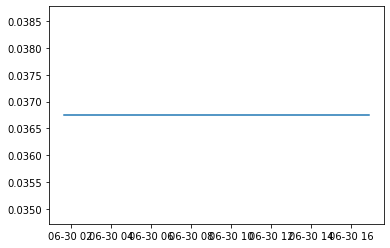

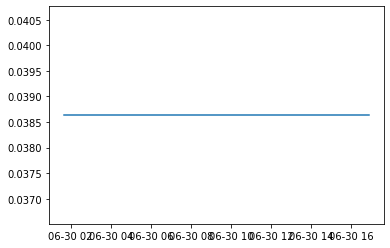

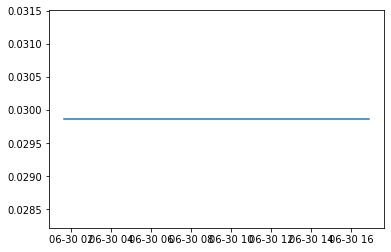

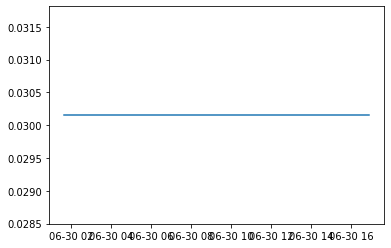

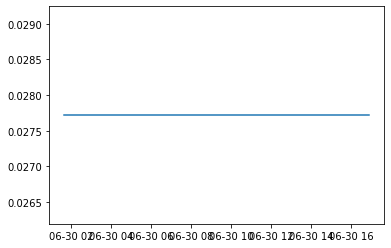

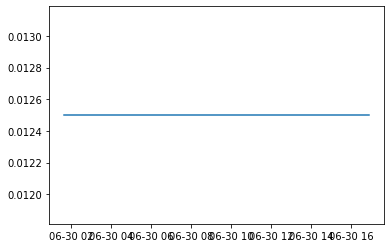

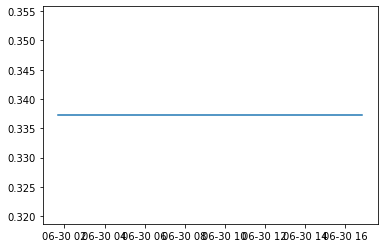

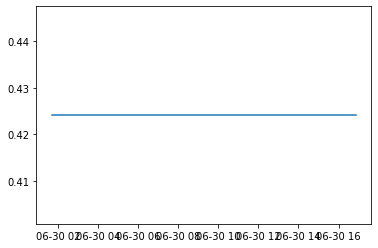

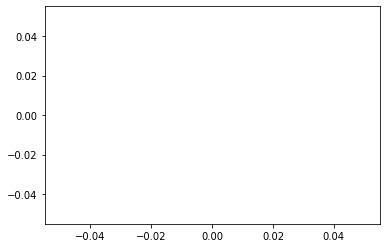

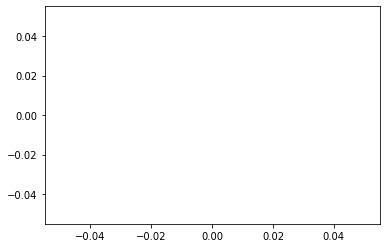

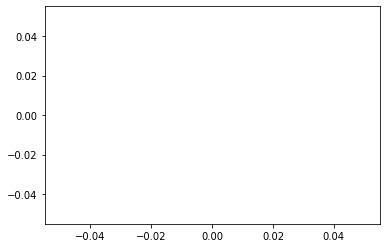

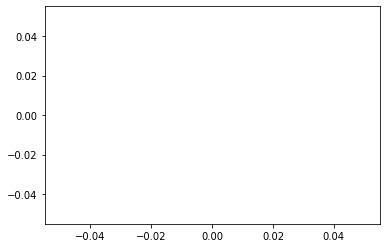

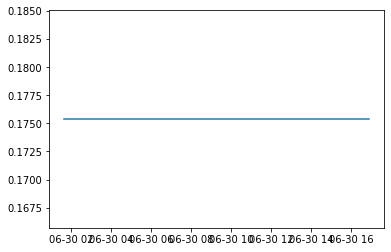

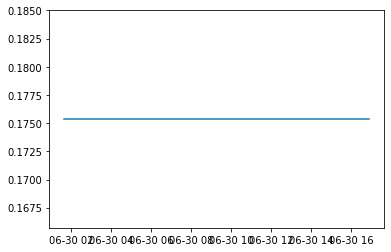

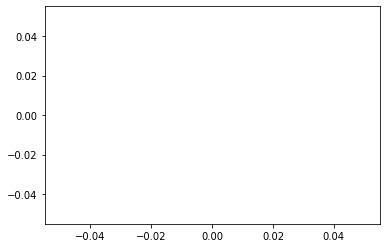

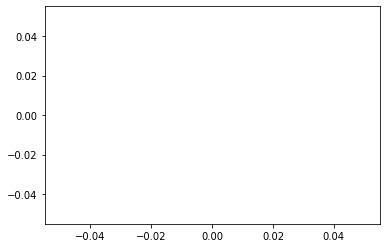

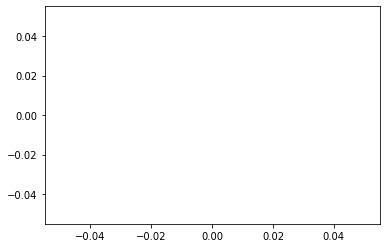

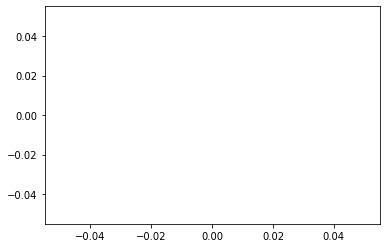

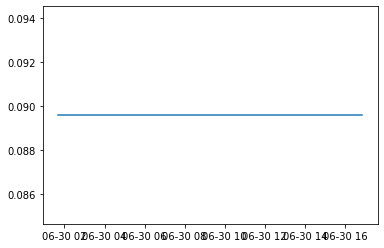

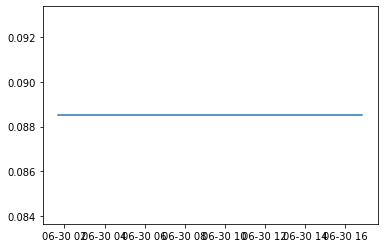

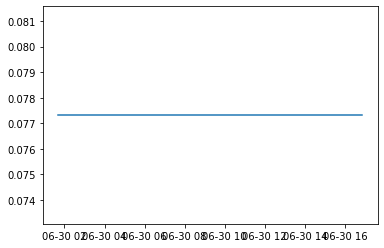

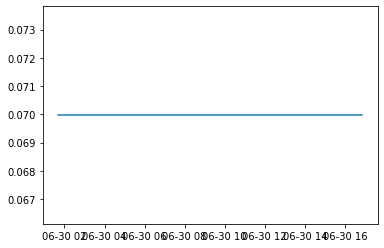

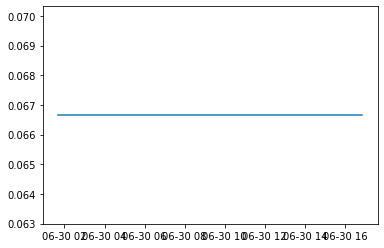

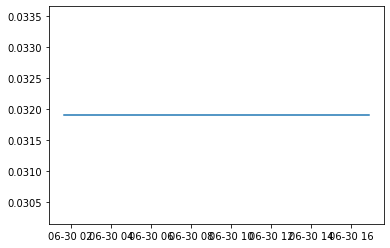

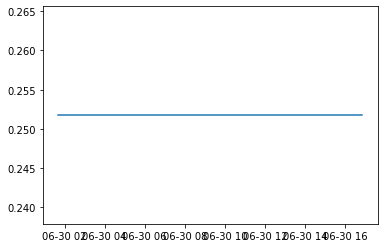

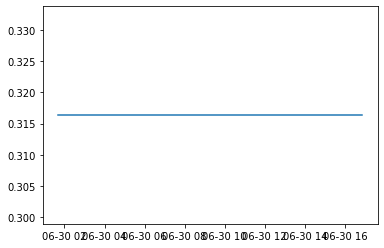

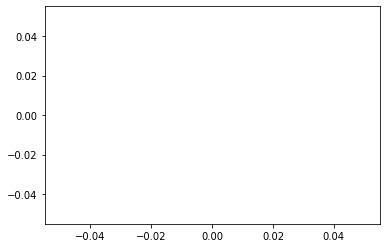

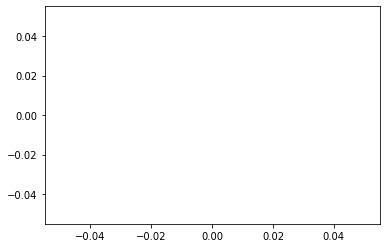

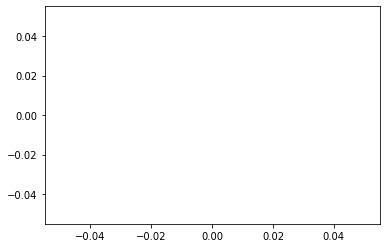

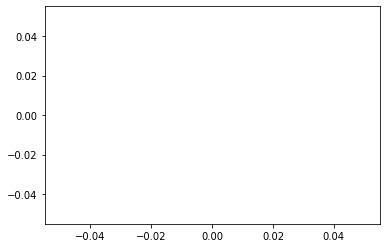

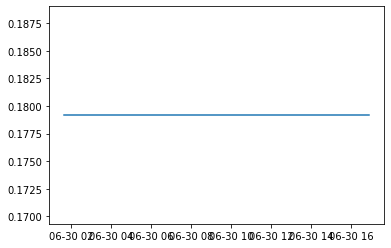

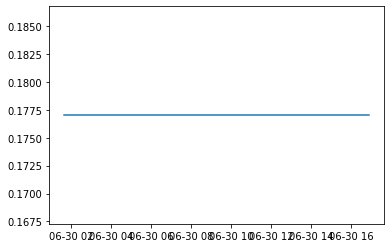

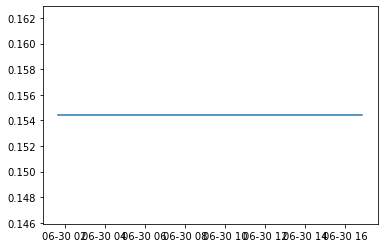

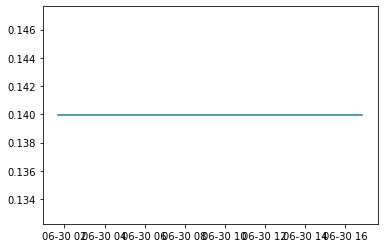

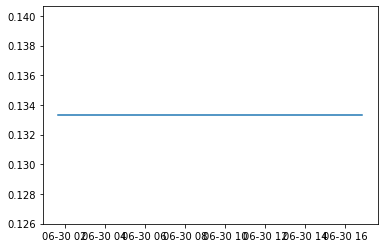

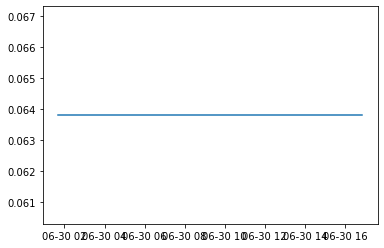

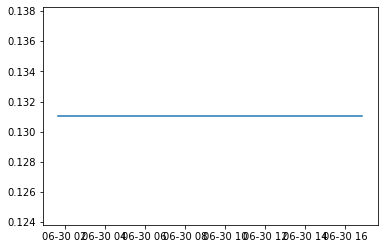

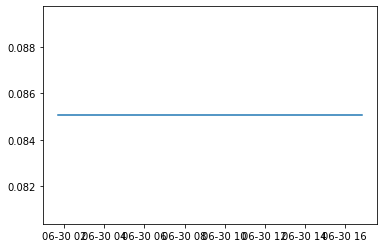

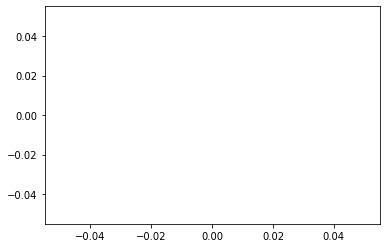

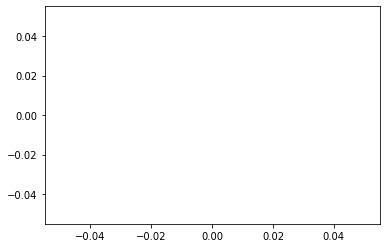

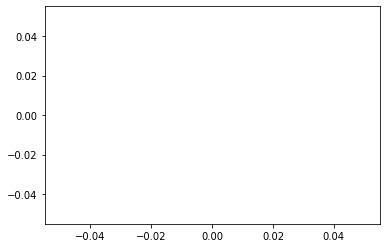

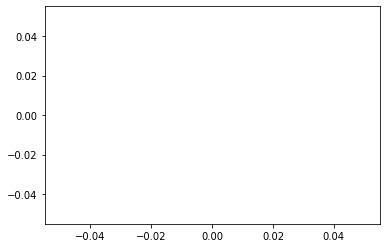

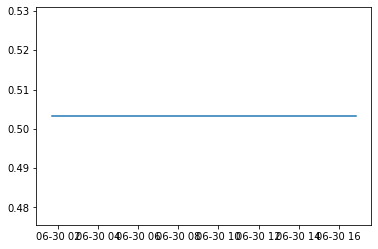

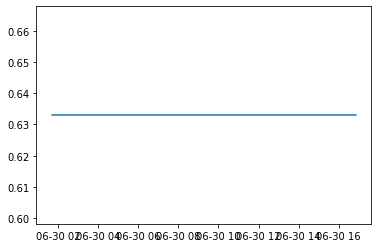

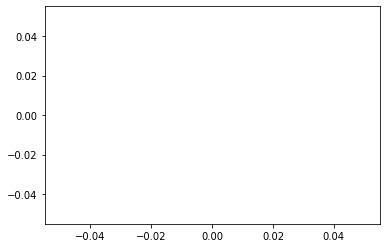

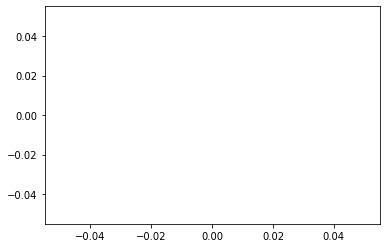

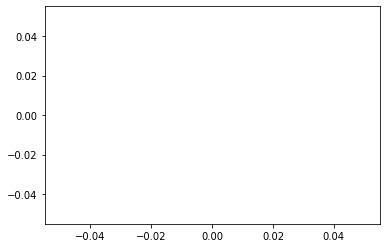

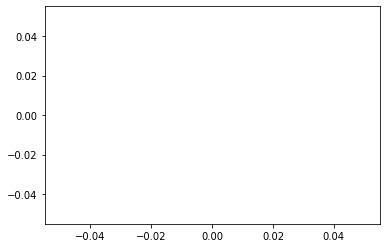

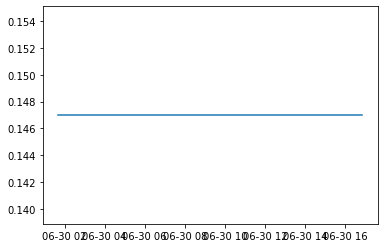

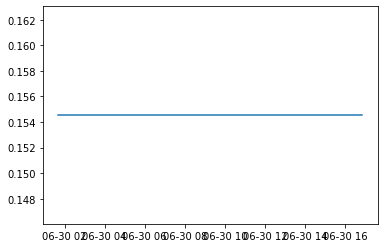

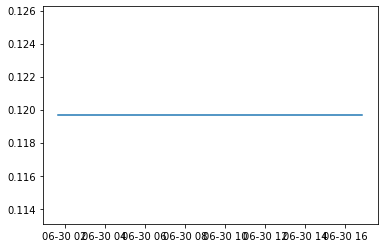

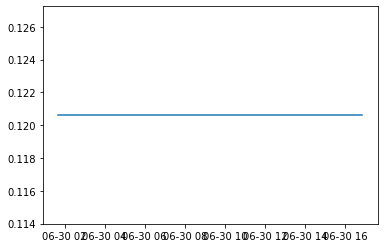

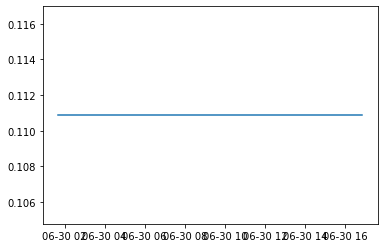

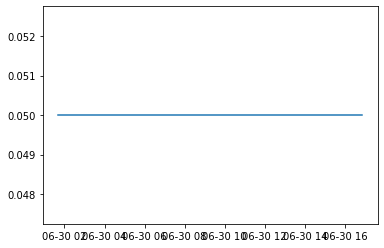

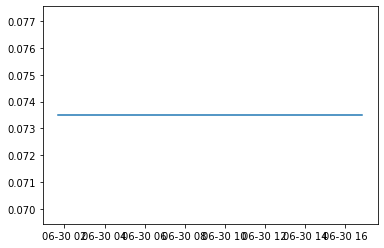

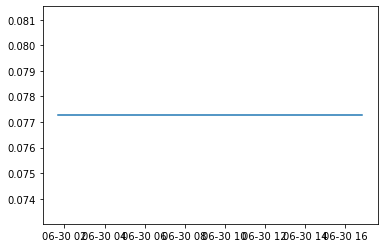

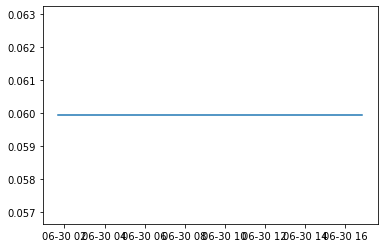

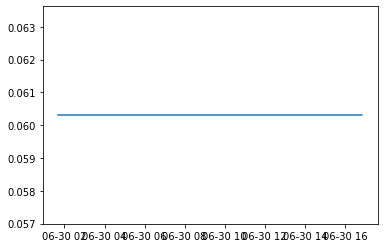

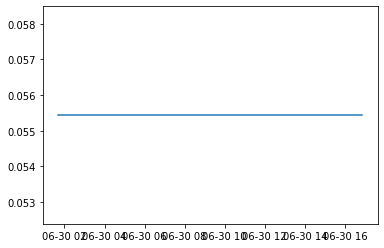

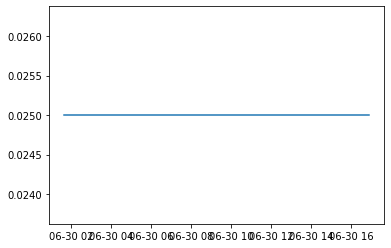

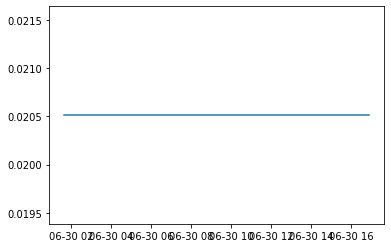

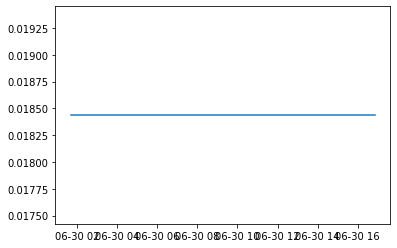

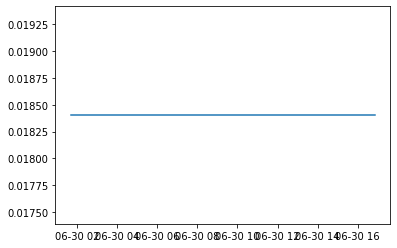

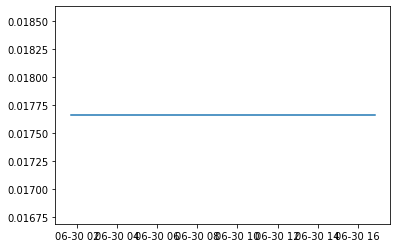

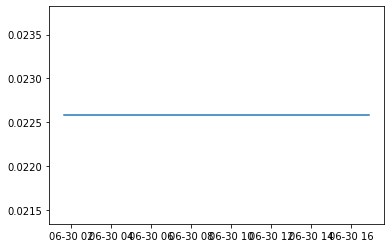

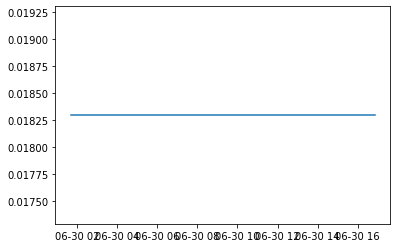

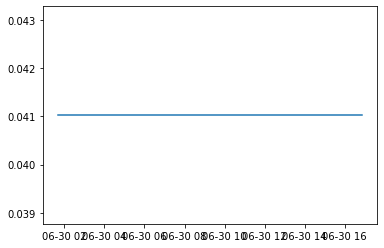

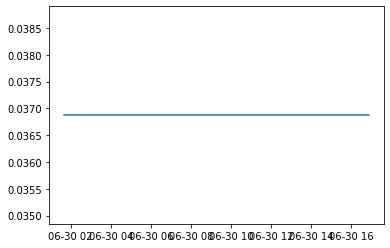

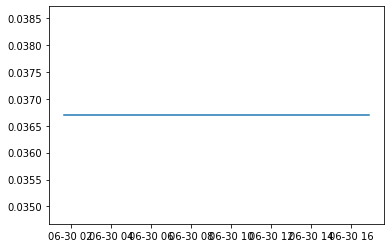

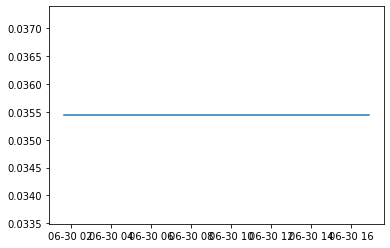

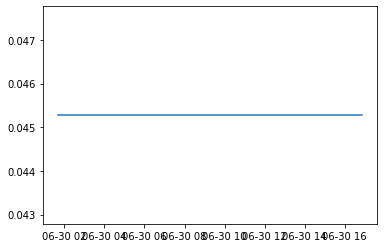

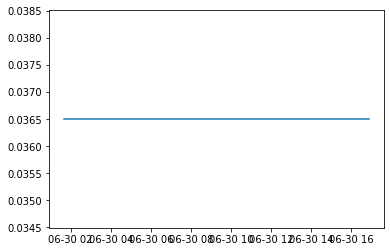

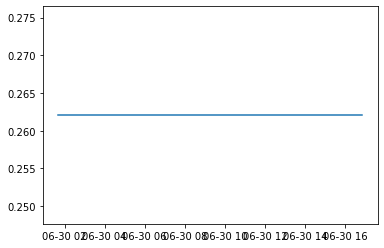

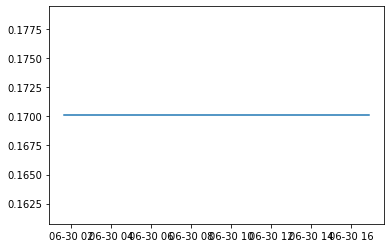

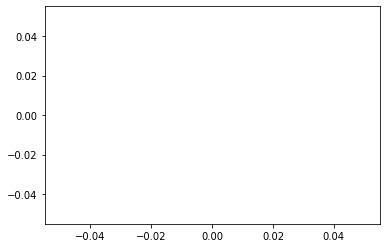

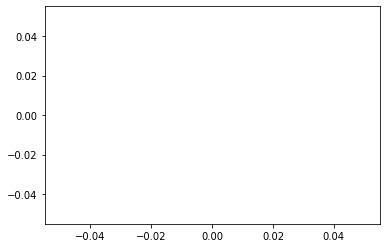

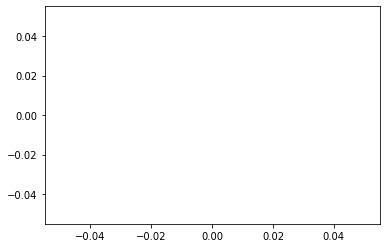

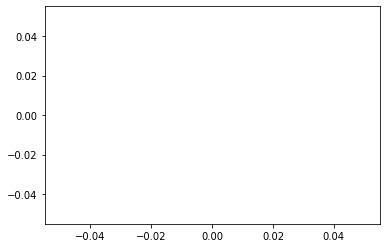

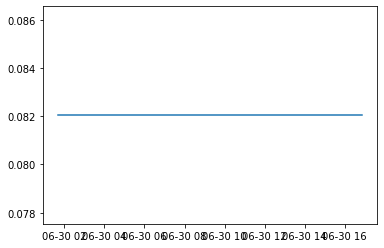

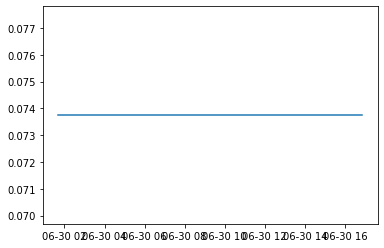

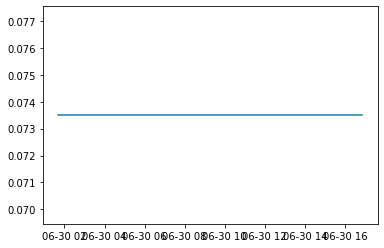

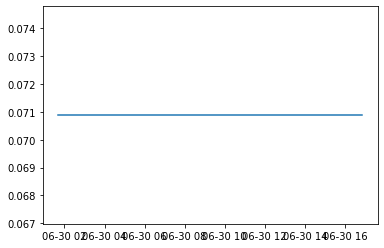

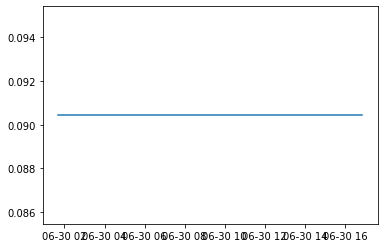

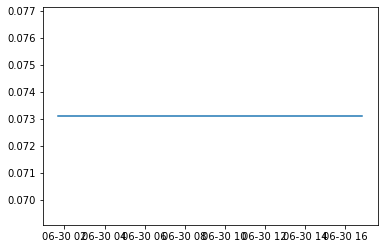

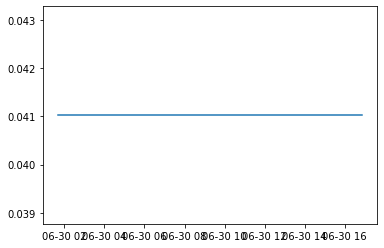

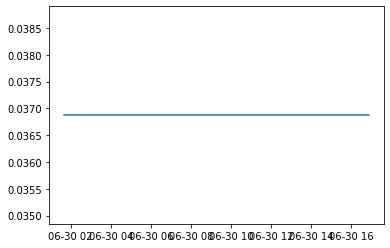

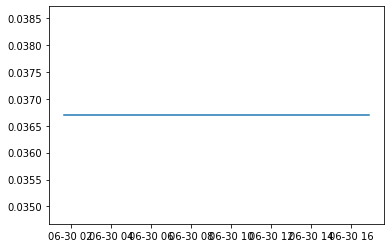

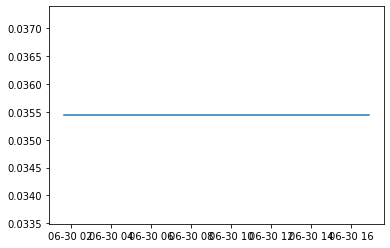

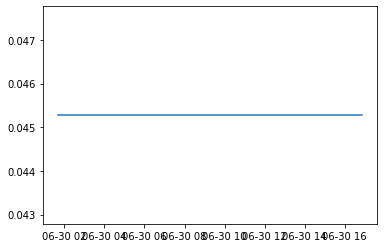

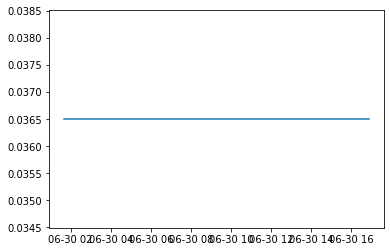

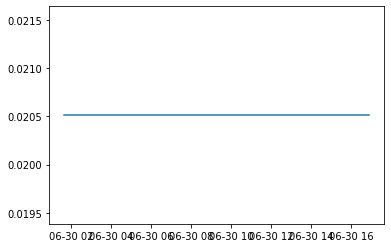

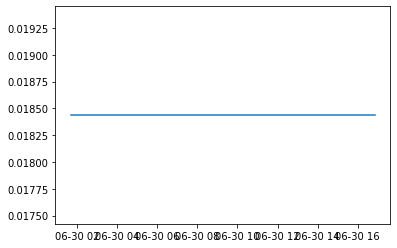

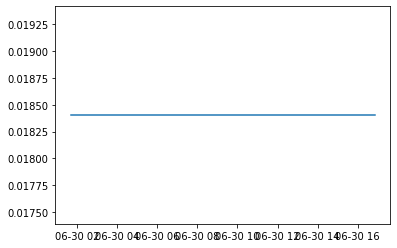

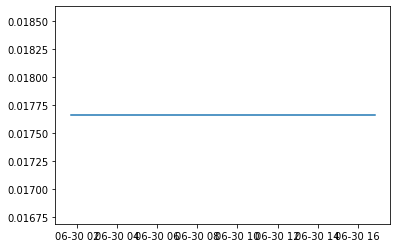

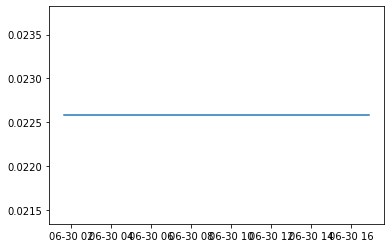

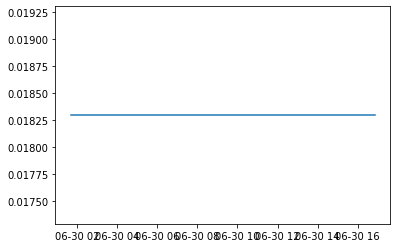

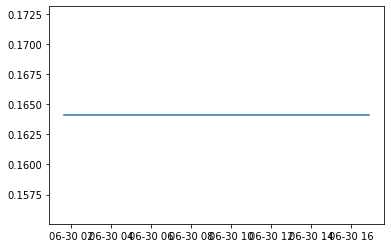

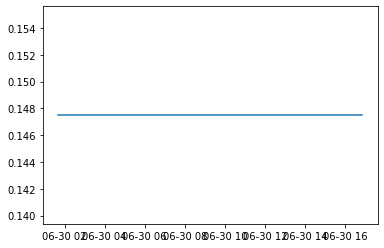

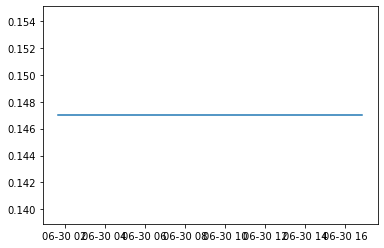

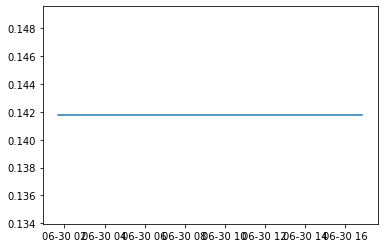

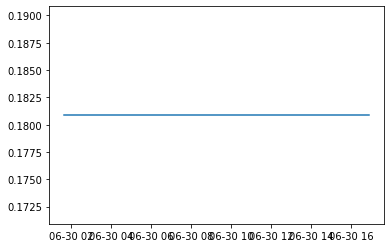

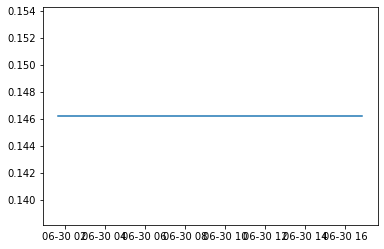

In [14]:
for size in sizes:
    for region in regions:
        data2_filtered = data2[(data2['size'] == size) & (data2['region'] == region)]
        dff = data2_filtered.groupby(['time'], as_index=False).mean()
        plot_data(dff['time'], dff['api_price'])

In [13]:
data2_filtered = data2[(data2['size'] == 'Standard_D4_v3') & (data2['region'] == 'ukwest')].mean()
data2_filtered_off = data2[(data2['size'] == 'Standard_D4_v3') & (data2['region'] == 'japaneast')].mean()
data2_filtered_off.head()

<ipython-input-13-28850749d9f6>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2_filtered = data2[(data2['size'] == 'Standard_D4_v3') & (data2['region'] == 'ukwest')].mean()
<ipython-input-13-28850749d9f6>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2_filtered_off = data2[(data2['size'] == 'Standard_D4_v3') & (data2['region'] == 'japaneast')].mean()


region                 NaN
size                   NaN
api_price              NaN
cli_price              NaN
pay_as_you_go_price    NaN
dtype: object

In [15]:
per_savings_off = (data2_filtered['api_price'] - data2_filtered_off['api_price'])/ data2_filtered['api_price']*100
per_savings_off
print(list(data2.columns))

['time', 'region', 'size', 'api_price', 'cli_price', 'pay_as_you_go_price', '1_year_reserved_price', '3_year_reserved_price', '%_saving_pay_as_you_go', '%_saving_1y_reserved', '%_saving_3y_reserved', 'date']


In [49]:
data2[data2['region'] == 'ukwest']['size'].unique()

array(['Standard_D16s_v4', 'Standard_F2', 'Standard_D4d_v4',
       'Standard_E4-2s_v4', 'Standard_E8-2s_v3', 'Standard_M8-2ms',
       'Standard_E16-4ds_v4', 'Standard_E2s_v3', 'Standard_M416is_v2',
       'Standard_E16-4s_v4', 'Standard_M32-16ms', 'Standard_E32-16ds_v4',
       'Standard_D4s_v3', 'Standard_D16ds_v4', 'Standard_E64-16ds_v4',
       'Standard_D8s_v4', 'Standard_E20d_v4', 'Standard_D4_v3',
       'Standard_E16-4s_v3', 'Standard_F1s', 'Standard_DS12_v2',
       'Standard_E8_v4', 'Standard_D16s_v3', 'Standard_M64',
       'Standard_D2d_v4', 'Standard_E16-8s_v3', 'Standard_D2ds_v4',
       'Standard_D64d_v4', 'Standard_D4_v2', 'Standard_F16',
       'Standard_M8ms', 'Standard_DS15_v2', 'Standard_E8-4s_v4',
       'Standard_E80is_v4', 'Standard_E4-2ds_v4', 'Standard_M64s',
       'Standard_DC2s_v2', 'Standard_E20s_v4', 'Standard_D8ds_v4',
       'Standard_E64i_v3', 'Standard_E32s_v4', 'Standard_DS12-2_v2',
       'Standard_M64m', 'Standard_M128-64ms', 'Standard_DS12-1_v2',


In [6]:
df_1 = data[data['api_price'] != data['cli_price']]

In [8]:
df_1['cli_price'].unique()

array([-inf])

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data2['region'] = le.fit_transform(data2['region'])
data2['size'] = le.fit_transform(data2['size'])

data2.head()

,time,region,size,api_price,cli_price,pay_as_you_go_price,1_year_reserved_price,3_year_reserved_price,%_saving_pay_as_you_go,%_saving_1y_reserved,%_saving_3y_reserved,date
0,2021-06-30 01:40:22.848509-04:00,2,0,0.036749,0.036749,0.096,0.057192,0.036834,61.719792,35.744263,0.231021,2021-06-30
1,2021-06-30 01:40:22.848509-04:00,2,13,0.337264,0.337264,2.350,0.720662,0.473059,85.648340,53.200814,28.705776,2021-06-30
2,2021-06-30 01:40:22.848509-04:00,2,16,0.175371,0.175371,0.752,0.443721,0.285769,76.679388,60.477233,38.631826,2021-06-30
3,2021-06-30 01:40:22.848509-04:00,2,7,0.089586,0.089586,0.328,0.156393,0.100000,72.687195,42.717273,10.414000,2021-06-30
4,2021-06-30 01:40:22.848509-04:00,2,12,0.251764,-inf,0.543,0.537785,0.353006,53.634622,53.185043,28.679984,2021-06-30


In [34]:

X_train, X_test, Y_train, Y_test = train_test_split(
    data2[[ 
        'region', 'size', 'pay_as_you_go_price'
    ]], 
    data2[['api_price']], 
    train_size=0.7, 
    test_size=0.3, 
    random_state=42
)

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(X_train, Y_train)

LinearRegression()

In [37]:
reg.score(X_test, Y_test)

0.7642832686051692